In [256]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [257]:
import pandas as pd
data='/home/luis/Desktop/PDG/data/flair_df.csv'
try:
    df = pd.read_csv(data)
    display(df.head())
except FileNotFoundError:
    print("Error: 'flair_df.csv' not found. Please ensure the file exists in the current directory.")
    df = None # Assign None to df in case of error
except pd.errors.ParserError:
    print("Error: Could not parse 'flair_df.csv'. Please check the file format.")
    df = None # Assign None to df in case of error

,Unnamed: 0.1,Unnamed: 0,PyRadiomics/Versions/diagnostics,Numpy/Versions/diagnostics,SimpleITK/Versions/diagnostics,PyWavelet/Versions/diagnostics,Python/Versions/diagnostics,Settings/Configuration/diagnostics,EnabledImageTypes/Configuration/diagnostics,Hash/Image-original/diagnostics,...,d.BoundingBox/Mask-original/diagnostics,e.BoundingBox/Mask-original/diagnostics,f.BoundingBox/Mask-original/diagnostics,a.CenterOfMassIndex/Mask-original/diagnostics,b.CenterOfMassIndex/Mask-original/diagnostics,c.CenterOfMassIndex/Mask-original/diagnostics,a.CenterOfMass/Mask-original/diagnostics,b.CenterOfMass/Mask-original/diagnostics,c.CenterOfMass/Mask-original/diagnostics,highGrade
0,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1ffbffc2fc605b7d5ef1c3b2a790d8a98c93f4dd,...,37,48,1,105.497619,161.988889,124.0,-32.579515,4.287051,55.478574,True
1,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},7b22c2b1767617dc0d3db815ae703599ce4e1f62,...,47,73,1,174.448790,149.808566,92.0,35.578989,3.151434,34.824340,True
2,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},87a8f9a8fefc50209701c5ec696c5e72e40c0e15,...,48,92,1,90.755240,152.673859,53.0,-39.491726,1.564687,-49.575207,True
3,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},efd706b8f24a144f47c8533ddda2b644b7f4896a,...,52,44,1,97.611413,171.559783,45.0,-29.823730,50.262244,-75.273479,True
4,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b4dd0e54af5ed18fe1f1b6f526f1fbd8b1b4d60a,...,50,45,1,127.684988,202.115248,10.0,-7.053511,34.052223,-15.169791,True


### Basic preprocessing

In [258]:
for col in df.columns:
    print(col)

Unnamed: 0.1
Unnamed: 0
PyRadiomics/Versions/diagnostics
Numpy/Versions/diagnostics
SimpleITK/Versions/diagnostics
PyWavelet/Versions/diagnostics
Python/Versions/diagnostics
Settings/Configuration/diagnostics
EnabledImageTypes/Configuration/diagnostics
Hash/Image-original/diagnostics
Dimensionality/Image-original/diagnostics
Mean/Image-original/diagnostics
Minimum/Image-original/diagnostics
Maximum/Image-original/diagnostics
Hash/Mask-original/diagnostics
VoxelNum/Mask-original/diagnostics
VolumeNum/Mask-original/diagnostics
10Percentile/firstorder/original
90Percentile/firstorder/original
Energy/firstorder/original
Entropy/firstorder/original
InterquartileRange/firstorder/original
Kurtosis/firstorder/original
Maximum/firstorder/original
MeanAbsoluteDeviation/firstorder/original
Mean/firstorder/original
Median/firstorder/original
Minimum/firstorder/original
Range/firstorder/original
RobustMeanAbsoluteDeviation/firstorder/original
RootMeanSquared/firstorder/original
Skewness/firstorder/

In [259]:
df.set_index('Id', inplace=True)
df.shape

(128, 134)

In [260]:
# HIGH and LOW grades balance

print('LOW: ', df[df['highGrade']==False].shape[0]/df.shape[0]) 

print('HIGH: ', df[df['highGrade']==True].shape[0]/df.shape[0]) 

LOW:  0.2265625
HIGH:  0.7734375


In [261]:
# separates object columns containing mainly metadata from 
# the nuemrical columns containing actual radiomic values

df_meta=df.select_dtypes(include=['object'])
df.drop(columns = df_meta.columns, inplace=True)
df.shape    

(128, 123)

In [262]:
df_meta.head()

,Unnamed: 0,PyRadiomics/Versions/diagnostics,Numpy/Versions/diagnostics,SimpleITK/Versions/diagnostics,PyWavelet/Versions/diagnostics,Python/Versions/diagnostics,Settings/Configuration/diagnostics,EnabledImageTypes/Configuration/diagnostics,Hash/Image-original/diagnostics,Dimensionality/Image-original/diagnostics,Hash/Mask-original/diagnostics
Id,,,,,,,,,,,
0.783201,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1ffbffc2fc605b7d5ef1c3b2a790d8a98c93f4dd,3D,731b2f2113593782807db4b12219c2641780e152
0.729412,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},7b22c2b1767617dc0d3db815ae703599ce4e1f62,3D,fa7105c5cad49bbeda063571fc091b6740bd8045
0.662097,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},87a8f9a8fefc50209701c5ec696c5e72e40c0e15,3D,4181a8a9f56aa706f630c2ec846e2b2ef8f29a0a
0.782308,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},efd706b8f24a144f47c8533ddda2b644b7f4896a,3D,1f79e01ce7d0e1d9fba7008e5ecfb3d13ca6f1ad
0.585369,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b4dd0e54af5ed18fe1f1b6f526f1fbd8b1b4d60a,3D,5e41117b1288a4f7b6599cccb046a09621df0248


### Statistics

Missing values per column:
 Unnamed: 0.1                                     0
Mean/Image-original/diagnostics                  0
Minimum/Image-original/diagnostics               0
Maximum/Image-original/diagnostics               0
VoxelNum/Mask-original/diagnostics               0
                                                ..
c.CenterOfMassIndex/Mask-original/diagnostics    0
a.CenterOfMass/Mask-original/diagnostics         0
b.CenterOfMass/Mask-original/diagnostics         0
c.CenterOfMass/Mask-original/diagnostics         0
highGrade                                        0
Length: 123, dtype: int64

Number of duplicated rows: 0

Summary Statistics:
        Unnamed: 0.1  Mean/Image-original/diagnostics  \
count         128.0                       128.000000   
mean            0.0                        62.688284   
std             0.0                        46.817455   
min             0.0                         7.929055   
25%             0.0                        18.825764 

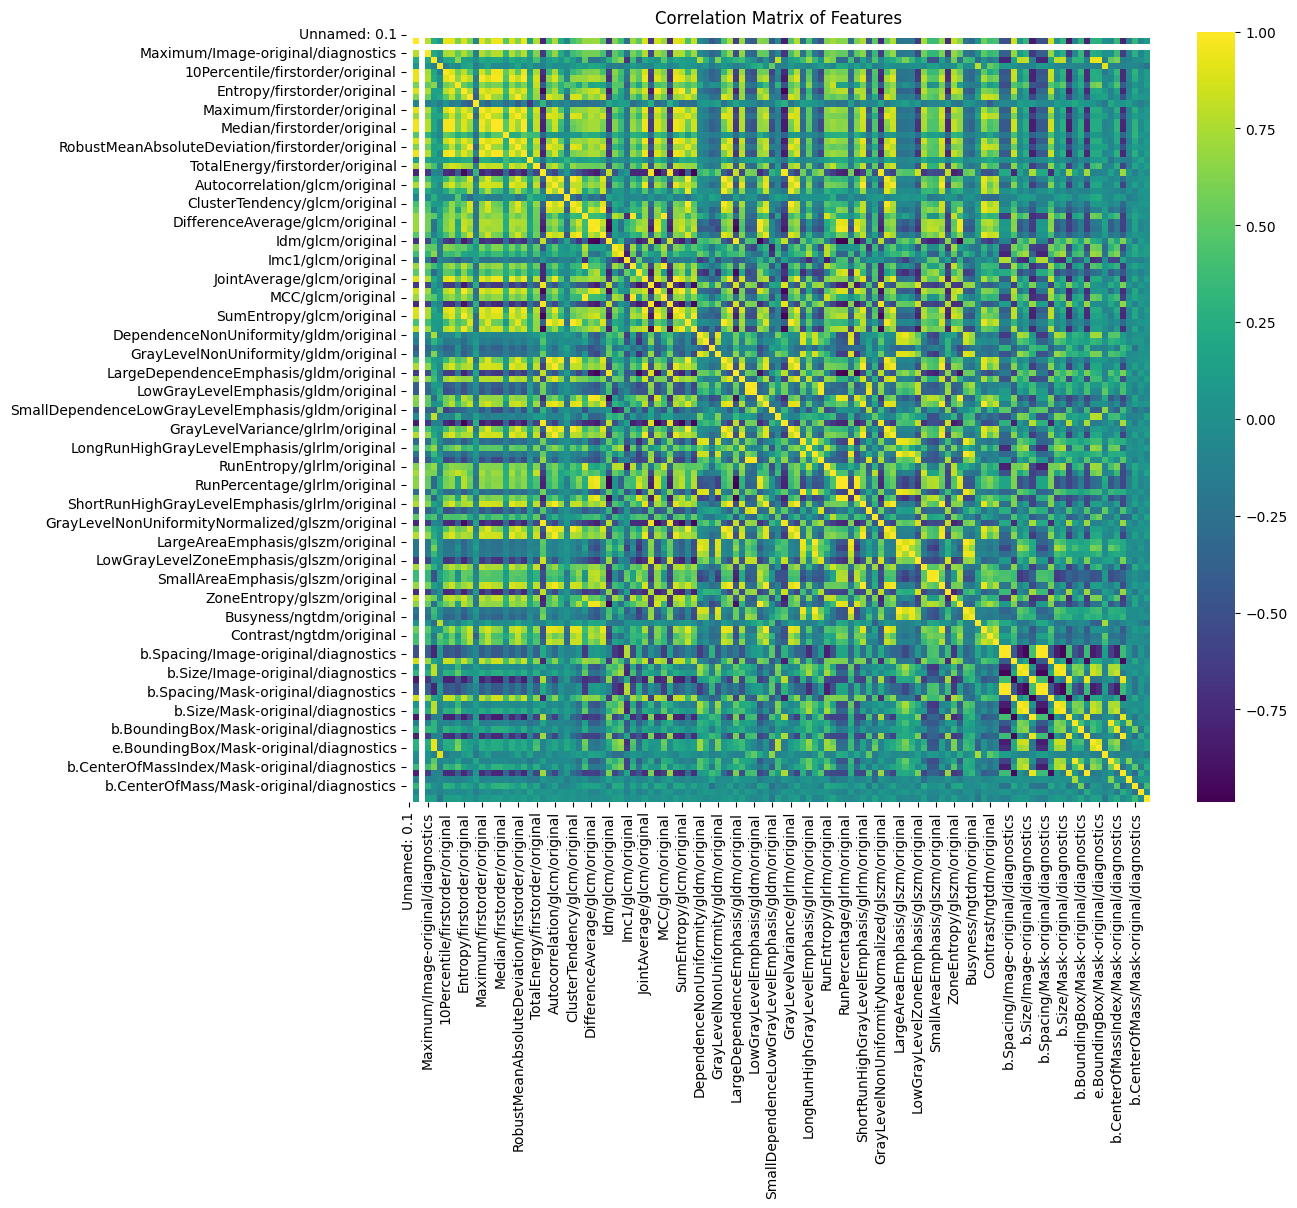

'\n# Histograms of numerical features\ndf.hist(figsize=(20, 20), bins=50)\nplt.suptitle("Histograms of Numerical Features")\nplt.show()\n\n# Pairplot for a subset of features\nsns.pairplot(df[[\'Strength\', \'Size.a\', \'Size.b\', \'Size.c\']], diag_kind="kde")\nplt.suptitle("Pairplot of Selected Features")\nplt.show()'

In [263]:
### Numerical Statistiques

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Check for duplicated rows
print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='viridis')
plt.title("Correlation Matrix of Features")
plt.show()
'''
# Histograms of numerical features
df.hist(figsize=(20, 20), bins=50)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Pairplot for a subset of features
sns.pairplot(df[['Strength', 'Size.a', 'Size.b', 'Size.c']], diag_kind="kde")
plt.suptitle("Pairplot of Selected Features")
plt.show()'''

## Outliers

In [264]:
targets=df[['highGrade']]

df.drop(columns=['highGrade'], inplace=True)

In [265]:
df_cp=df.copy()

### General Outliers

total out:  36
122


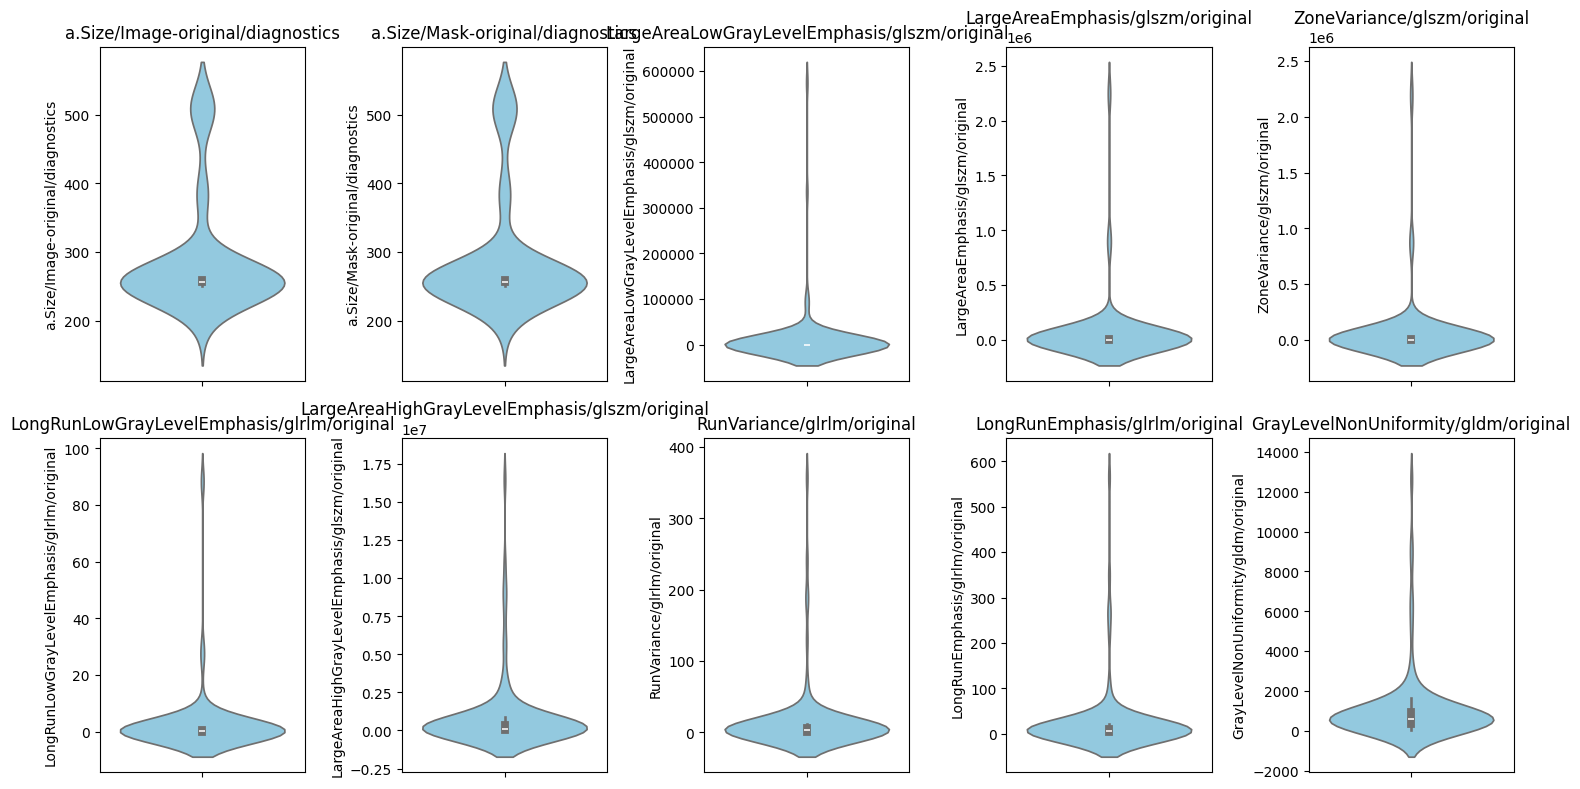

In [266]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
multiplier=8
outliers_count = ((df < (Q1 - multiplier* IQR)) | (df > (Q3 + multiplier* IQR))).sum()

totalOut = sum(x > 0 for x in outliers_count)
print('total out: ', totalOut)

# Seleccionar las 10 columnas con mas valores atipicos
top_outlier_cols = outliers_count.sort_values(ascending=False).head(10).index.tolist()

outliers_count.sort_values(ascending=False).index.tolist()
print(len(outliers_count.sort_values(ascending=False).index.tolist()))

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 5, i + 1)  
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

### Low Grade Outliers

/tmp/ipykernel_30216/3208747073.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['highGrade']=targets['highGrade']


total out:  20
122


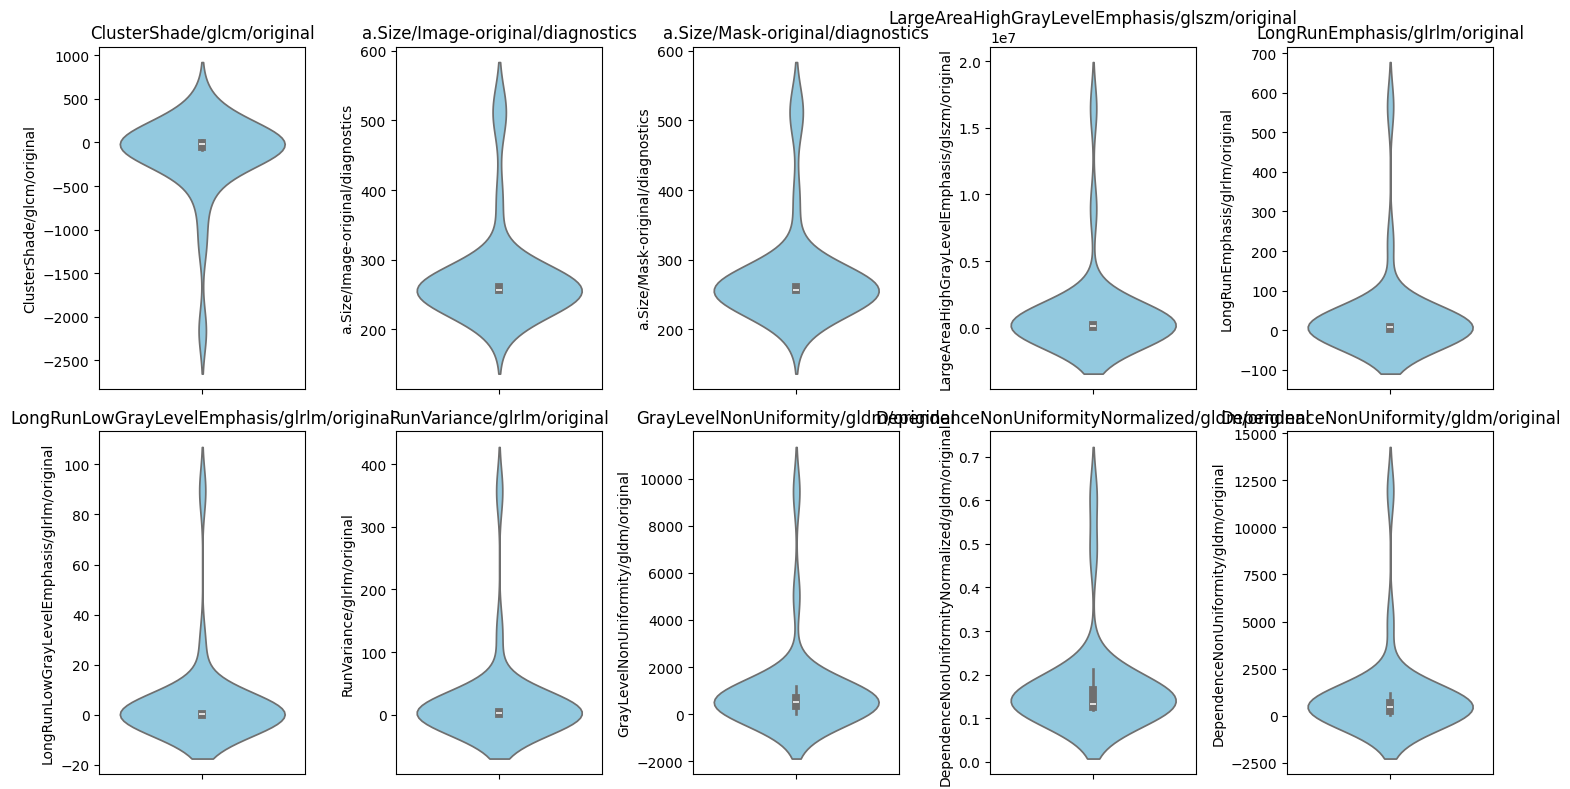

In [267]:

df['highGrade']=targets['highGrade']
df=df[df['highGrade']==False]
df.drop(columns=['highGrade'], inplace=True)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
multiplier=8
outliers_count = ((df < (Q1 - multiplier* IQR)) | (df > (Q3 + multiplier* IQR))).sum()

totalOut = sum(x > 0 for x in outliers_count)
print('total out: ', totalOut)

# Seleccionar las 10 columnas con mas valores atipicos
top_outlier_cols = outliers_count.sort_values(ascending=False).head(10).index.tolist()

outliers_count.sort_values(ascending=False).index.tolist()
print(len(outliers_count.sort_values(ascending=False).index.tolist()))

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 5, i + 1)  
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

### High Grade Outliers

total out:  33
122


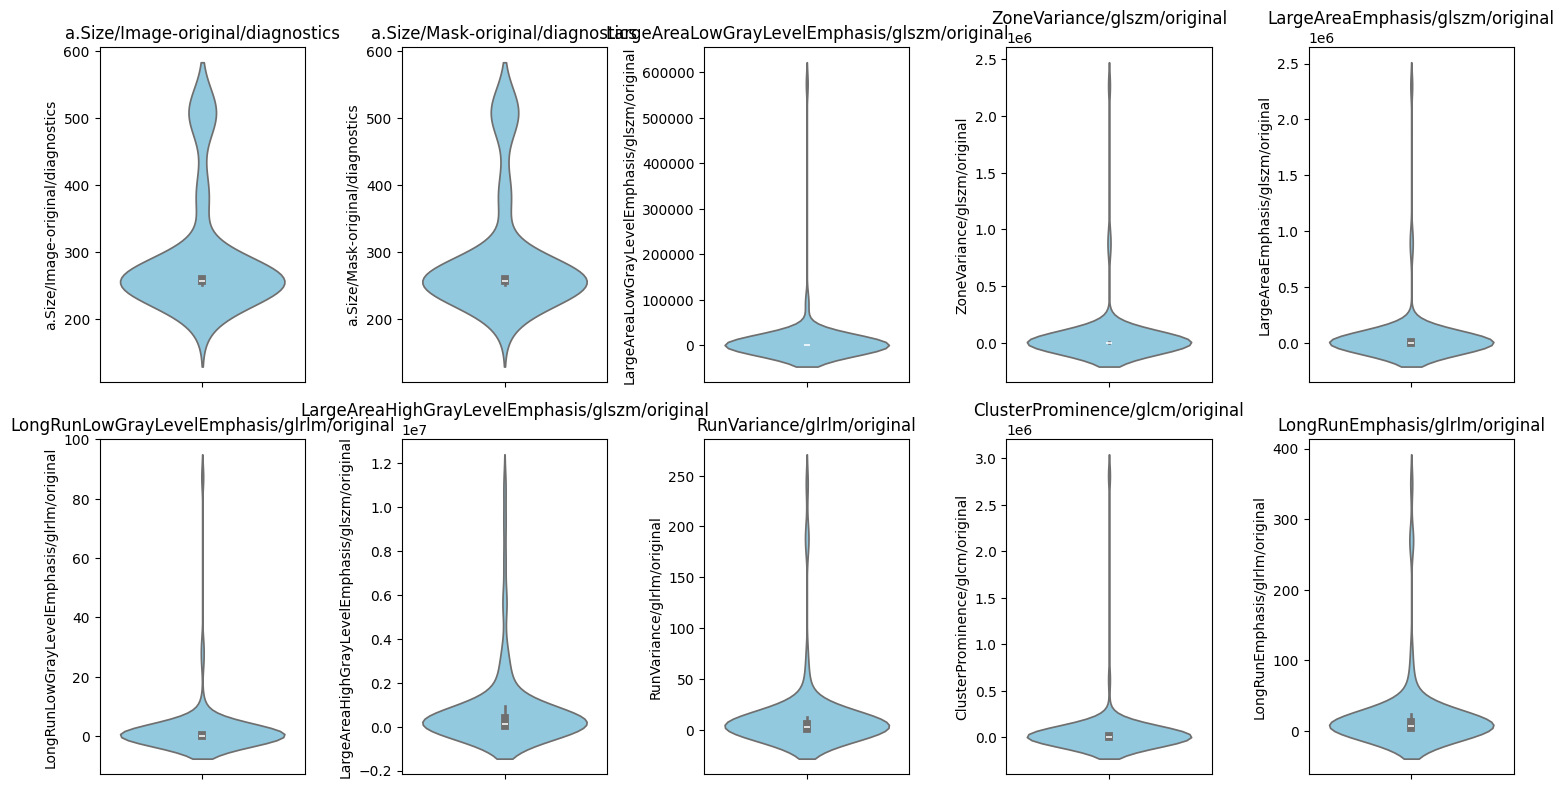

In [268]:

df=df_cp.copy()
df['highGrade']=targets['highGrade']
df=df[df['highGrade']==True]
df.drop(columns=['highGrade'], inplace=True)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
multiplier=8
outliers_count = ((df < (Q1 - multiplier* IQR)) | (df > (Q3 + multiplier* IQR))).sum()

totalOut = sum(x > 0 for x in outliers_count)
print('total out: ', totalOut)

# Seleccionar las 10 columnas con mas valores atipicos
top_outlier_cols = outliers_count.sort_values(ascending=False).head(10).index.tolist()

outliers_count.sort_values(ascending=False).index.tolist()
print(len(outliers_count.sort_values(ascending=False).index.tolist()))

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 5, i + 1)  
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

In [269]:
df=df_cp.copy()
df['highGrade']=targets['highGrade']

In [270]:

df = df.loc[:, df.nunique() > 1]
df

,Mean/Image-original/diagnostics,Maximum/Image-original/diagnostics,VoxelNum/Mask-original/diagnostics,VolumeNum/Mask-original/diagnostics,10Percentile/firstorder/original,90Percentile/firstorder/original,Energy/firstorder/original,Entropy/firstorder/original,InterquartileRange/firstorder/original,Kurtosis/firstorder/original,...,d.BoundingBox/Mask-original/diagnostics,e.BoundingBox/Mask-original/diagnostics,f.BoundingBox/Mask-original/diagnostics,a.CenterOfMassIndex/Mask-original/diagnostics,b.CenterOfMassIndex/Mask-original/diagnostics,c.CenterOfMassIndex/Mask-original/diagnostics,a.CenterOfMass/Mask-original/diagnostics,b.CenterOfMass/Mask-original/diagnostics,c.CenterOfMass/Mask-original/diagnostics,highGrade
Id,,,,,,,,,,,,,,,,,,,,,
0.783201,18.002486,237.0,1260,1,60.0,117.0,1.115748e+07,1.886821,31.00,3.145006,...,37,48,1,105.497619,161.988889,124.0,-32.579515,4.287051,55.478574,True
0.729412,15.832890,253.0,2685,1,66.0,147.0,3.206621e+07,2.402951,48.00,2.851318,...,47,73,1,174.448790,149.808566,92.0,35.578989,3.151434,34.824340,True
0.662097,17.977700,270.0,3244,1,91.0,170.0,5.772904e+07,2.366747,35.25,3.570544,...,48,92,1,90.755240,152.673859,53.0,-39.491726,1.564687,-49.575207,True
0.782308,32.582970,314.0,1840,1,112.0,218.0,5.558937e+07,2.373936,23.00,3.644249,...,52,44,1,97.611413,171.559783,45.0,-29.823730,50.262244,-75.273479,True
0.585369,133.998494,981.0,1692,1,461.1,611.0,5.079416e+08,3.194892,69.00,4.173511,...,50,45,1,127.684988,202.115248,10.0,-7.053511,34.052223,-15.169791,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.774391,15.155052,277.0,1889,1,84.0,143.0,2.601654e+07,2.038252,30.00,5.379048,...,46,52,1,100.248280,132.161461,83.0,-27.790945,-22.802816,3.073746,False
0.720461,19.229200,325.0,3652,1,73.1,185.0,7.703724e+07,2.639068,48.00,3.390412,...,65,76,1,113.679354,101.386911,113.0,-14.544406,-44.262694,52.499864,False
0.601364,213.624087,1411.0,6199,1,645.0,815.0,3.315145e+09,3.570069,87.00,9.531671,...,72,114,1,73.283755,188.893209,11.0,-43.829599,22.428269,-2.420712,True


In [271]:
import pandas as pd
# Función para detectar y tratar outliers utilizando el IQR
def tratar_outliers_iqr(df, multiplier=8):
    # Selecciona solo las columnas numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in num_cols:
        # Calcular Q1 (primer cuartil), Q3 (tercer cuartil) y IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites inferior y superior para los outliers
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier* IQR

        # Imprimir los límites de cada columna
        #print(f"{col}: Limite inferior={lower_bound}, Limite superior={upper_bound}")

        # Reemplazar los valores por los límites (capping)
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

# Aplicar la función para tratar los outliers en el DataFrame
df = tratar_outliers_iqr(df)


In [274]:
df.to_csv('processedFlair.csv', index=True)

In [273]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Function to calculate Cohen's d for numerical columns
def cohens_d(group1, group2):
    mean_diff = group1.mean() - group2.mean()
    pooled_std = np.sqrt(((group1.shape[0]-1)*(group1.std()**2) + (group1.shape[0]-1)*(group2.std()**2)) / (group1.shape[0]+group2.shape[0]-2))
    return np.abs(mean_diff / pooled_std)


high_graders = df[df['highGrade'] == True]
low_graders = df[df['highGrade'] == False]

differences = []


for column in df.columns:
    if column == 'highGrade':
        continue

    # Calculate Cohen's d for numerical columns
    d = cohens_d(high_graders[column], low_graders[column])
    differences.append((column, d, 'numerical'))


# Convert to DataFrame and sort by difference score
diff_df = pd.DataFrame(differences, columns=['Column', 'Difference', 'Type'])
top_10 = diff_df.sort_values(by='Difference', ascending=False).head(30)

# Print results
print("Top 10 columns with largest differences between highGraders and lowGraders:")
print(top_10[['Column', 'Difference', 'Type']])

Top 10 columns with largest differences between highGraders and lowGraders:
                                                Column  Difference       Type
118           b.CenterOfMass/Mask-original/diagnostics    0.773829  numerical
115      b.CenterOfMassIndex/Mask-original/diagnostics    0.465312  numerical
109            b.BoundingBox/Mask-original/diagnostics    0.414888  numerical
68               RunLengthNonUniformity/glrlm/original    0.374059  numerical
58   SmallDependenceLowGrayLevelEmphasis/gldm/original    0.350334  numerical
75               GrayLevelNonUniformity/glszm/original    0.342483  numerical
6                           Energy/firstorder/original    0.340941  numerical
92                           Coarseness/ngtdm/original    0.312073  numerical
59               GrayLevelNonUniformity/glrlm/original    0.311097  numerical
53   LargeDependenceHighGrayLevelEmphasis/gldm/orig...    0.302397  numerical
111            d.BoundingBox/Mask-original/diagnostics    0.283932

/tmp/ipykernel_30216/2759210152.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.abs(mean_diff / pooled_std)
